<a href="https://colab.research.google.com/github/john-s-butler-dit/Decision-Making-Models/blob/master/WongWang2006%20Reduced%20Two%20Variable%20Model%20without%20AMPA%20-%20RungKutta4th.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Recurrent Network Mechanism of Time Integration in Perceptual Decisions
Wong,  Wang
Journal of Neuroscience, January 2006, 26(4):1212-1328

TESTING
Testing 4

# Appendix Model
## Reduced two-variable model without AMPA at recurrent synapses
The reduced two-variable model is in its simplest form if we
assume that there is no AMPA at the recurrent synapses.

### Calling Library Fuctions

In [1]:
# LIBRARY

import numpy as np # vector manipulation
import math  # math functions
import sys

# THIS IS FOR PLOTTING
%matplotlib inline
import matplotlib.pyplot as plt # side-stepping mpl backend
import warnings
warnings.filterwarnings("ignore")


### The Reduced Network Model
#### Firing rate
$$ H_i=\frac{a x_i-b}{(1-exp[-d(ax_i-b)]}$$

$$ a=270 (VnC)^{-1},$$
$$ b=108Hz,$$
$$ d=0.154s$$

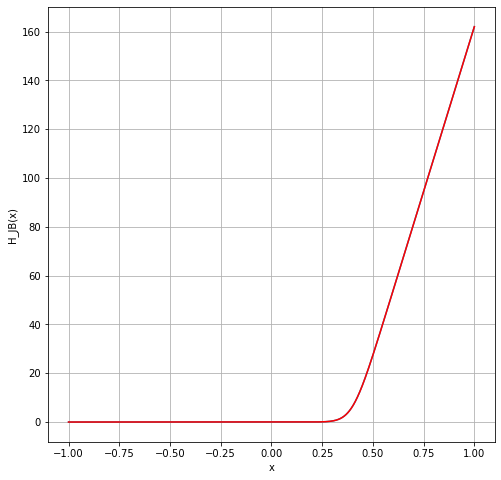

In [2]:
def H_JB(x):
    a = 270
    b = 108
    d = 0.154
    f = (a*x-b)/(1-np.exp(-d*(a*x-b)))
    return f

def H(x):
    a = 270
    b = 108
    d = 0.154
    h = (a*x-b)/(1-np.exp(-d*(a*x-b)))
    return h

x=np.arange(-1,1,0.0001)
fig = plt.figure(figsize=(8,8))
plt.plot(x,H_JB(x))
plt.plot(x,H(x),'r')

plt.grid()
plt.xlabel('x')
plt.ylabel('H_JB(x)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()




### Neural Circuit
$$ x_{1}=J_{11}S_1-J_{12}S_2+I_{0}+I_{1}+I_{noise,1}$$
$$ x_{2}=J_{22}S_2-J_{21}S_1+I_{0}+I_{2}+I_{noise,1}$$

where the synaptic couplings are $J_{11}=0.2609$, $J_{22}=0.2609$, $J_{12}=0.0497$ and $J_{21}=0.0497$.
$I_{0}=0.3255 nA$ represents external input 


In [3]:
def total_synaptic_current(S_L,S_R,I_L,I_R,I_noise_L,I_noise_R,direction):
    # Synaptic coupling
    J_LL=J_RR=0.2609 # nA
    J_LR=J_RL=0.0497 # nA
    I_0=0.3255  # nA
    x_L=J_LL*S_L-J_LR*S_R+I_0+I_L+I_noise_L
    x_R=J_RR*S_R-J_RL*S_L+I_0+I_R+I_noise_R
    if (direction == "L"):
        x=J_LL*S_L-J_LR*S_R+I_0+I_L+I_noise_L
    elif(direction == "R"):
        x=J_RR*S_R-J_RL*S_L+I_0+I_R+I_noise_R
    return x#_1, x_2


### Background activity
$$ \tau_{AMPA}\frac{d I_{noise,i}(t)}{dt} =-I_{noise,i}(t)+\eta_i(t)\sqrt{\tau_{AMPA}}\sigma_{noise}$$
$$ \tau_{AMPA}=2ms,$$
$$ \sigma_{noise}=0.02,$$
$$ \eta- white \ noise $$

In [4]:
def Background_Activity(I_noise,h):
    sigma_noise=0.02 # nA
    tau_AMPA=2/1000#ms
    eta_noise=np.random.normal(0,1,1)
    I_0=0.0#3255  # nA
    k1=1/tau_AMPA*(-(I_noise-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    k2=1/tau_AMPA*(-(I_noise+h/2*k1-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    k3=1/tau_AMPA*(-(I_noise+h/2*k2-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    k4=1/tau_AMPA*(-(I_noise+h*k3-I_0)+eta_noise*np.sqrt(tau_AMPA)*sigma_noise)
    I_noise_new=I_noise+h/6*(k1+2*k2+2*k3+k4)
    #I_noise_new=I_noise+h*(k1)
    
    return I_noise_new

### Network Dynamics
$$ \frac{d S_{i}}{dt} =\frac{-S_{i}}{\tau_S}+\big((1-S_i)\gamma H(x_i)\big)$$
$$\tau_S=100ms$$
$$\tau_S=0.1s$$
$$\gamma=0.641$$

Euler 
w_{i+1}

In [5]:
def S_diff(S,x,h):
    tau_S=100/1000#100 #ms
    𝛾=0.641
    h1=h
    k1=((-S/tau_S)+(1-S)*𝛾*H(x))
    k2=((-(S+h1/2*k1)/tau_S)+(1-(S+h1/2*k1))*𝛾*H(x))
    k3=((-(S+h1/2*k2)/tau_S)+(1-(S+h1/2*k2))*𝛾*H(x))
    k4=((-(S+h1*k3)/tau_S)+(1-(S+h1*k3))*𝛾*H(x))
    S_new=S+h1*(k1+2*k2+2*k3+k4)
    #S_new=S+h1*(k1)#+2*k2+2*k3+k4)
    return S_new

### Input Current Target

$$ I_i=J_{A,ext}\mu_0\left(1\pm \frac{c'}{100} \right) $$

$$\mu=30$$ Hz- spikes per second
$$ f=1$$  Only in Wong et al 2007
$$ J_{A,ext}=5.2 \times 10^{-4}$$
$$ c' $$ Coherence

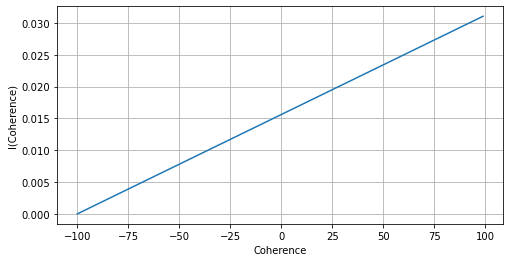

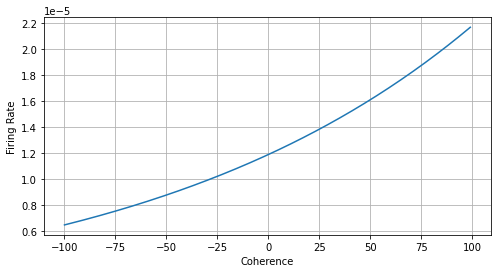

In [6]:
def I_input_1(c_dash):
    J_A_ext=5.2*(10**(-4))# nA/Hz
    mu_0=30 # Hz
    f=1
    I_motion=J_A_ext*mu_0*(1+f*(c_dash)/100)
    return I_motion

All_coh=np.arange(-100,100,1)
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,I_input_1(All_coh))
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('I(Coherence)')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()
fig = plt.figure(figsize=(8,4))
plt.plot(All_coh,H_JB(I_input_1(All_coh)))
plt.grid()
plt.xlabel('Coherence')
plt.ylabel('Firing Rate')
#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()



# Initial Conditions

In [7]:
h=0.1/1000
time=np.arange(-1,2+h,h)
J_A_ext=5.2*(10**(-4)) # nA/Hz
mu_0=30.0
M=20
N=len(time)
I_noise_L=0.0001*np.random.normal(0,1,[M, N])
I_noise_R=0.0001*np.random.normal(0,1,[M, N])

x_L=J_A_ext*mu_0*np.ones([M, N])
x_R=J_A_ext*mu_0*np.ones([M, N])

N=len(time)

S_L=0.2+0.02*np.random.normal(0,1,[M, N])
S_R=0.2+0.02*np.random.normal(0,1,[M, N])
#I_L=J_A_ext*mu_0+0.0001*np.random.normal(0,1,[M, N])
#I_R=J_A_ext*mu_0+0.0001*np.random.normal(0,1,[M, N])


In [8]:
S_L.shape

(20, 30001)

In [9]:
COHERENCE_LEVEL=.040
γ = 0.641
τ = 100/1000
τ_ampa=2/1000
sigma=0.02

for j in range(0,M):
    
    for i in range (0,N-1):
        ## INPUT
        if time[i] >=0 and time[i]<1:
            c_dash=COHERENCE_LEVEL
           # I_L[j,i]=J_A_ext*mu_0*(1+(c_dash)/100)
            #I_R[j,i]=J_A_ext*mu_0*(1-(c_dash)/100)
            I_L=J_A_ext*mu_0*(1+(c_dash))
            I_R=J_A_ext*mu_0*(1-(c_dash))
           # IL = JA*μ*(1+(c_dash))
           # IR = JA*μ*(1-(c_dash))

        else:
            c_dash=0.0
            I_R=0
            I_L=0
            IL=0
            IR=0


        if i<2000:
          #  SL[i+1,j] = SL[0,j]
          #  SR[i+1,j] = SR[0,j]
            S_L[j,i+1] = S_L[j,0]
            S_R[j,i+1] = S_R[j,0]
                
            
        #I_noise_1[i+1]=Background_Activity(I_noise_1[i],h)
        #I_noise_2[i+1]=Background_Activity(I_noise_2[i],h)

        #I_1[i]=I_input_1(c_dash)
        #I_2[i]=I_input_1(-c_dash)
        #x_1[i],x_2[i]=total_synaptic_current(S_1[i],S_2[i],I_1[i],
        #                                  I_2[i],I_noise_1[i],I_noise_2[i])
        S_L[j,i+1]=S_diff(S_L[j,i],x_L[j,i],h)
        S_R[j,i+1]=S_diff(S_R[j,i],x_R[j,i],h)

#        S_L[j,i+1]=S_L[j,i]+h*((-S_L[j,i]/τ) + (1-S_L[j,i])*γ*H(x_L[j,i]))
 #       S_R[j,i+1]=S_R[j,i]+h*((-S_R[j,i]/τ) + (1-S_R[j,i])*γ*H(x_R[j,i]))
        x_R[j,i+1]=total_synaptic_current(S_L[j,i+1], S_R[j,i+1],I_L,I_R, 
                                                             I_noise_L[j,i+1], I_noise_R[j,i+1], "R")
        x_L[j,i+1]=total_synaptic_current(S_L[j,i+1], S_R[j,i+1],I_L,I_R, 
                                                             I_noise_L[j,i+1], I_noise_R[j,i+1], "L")
              
      #  SL[i+1,j]=SL[i,j]+h*((-SL[i,j]/τ) + (1-SL[i,j])*γ*H(total_synaptic_current(SL[i,j], SR[i,j], noise_L[i], noise_R[i],IL,IR, "L")))
      #  SR[i+1,j]=SR[i,j]+h*((-SR[i,j]/τ) + (1-SR[i,j])*γ*H(total_synaptic_current(SL[i,j], SR[i,j], noise_L[i], noise_R[i],IL,IR, "R")))
      #  FR[i+1,j]=H(x(SL[i+1,j], SR[i+1,j], noise_L[i+1], noise_R[i+1],IL,IR, "R"))
      #  FL[i+1,j]=H(x(SL[i+1,j], SR[i+1,j], noise_L[i+1], noise_R[i+1],IL,IR, "L"))


### Plotting


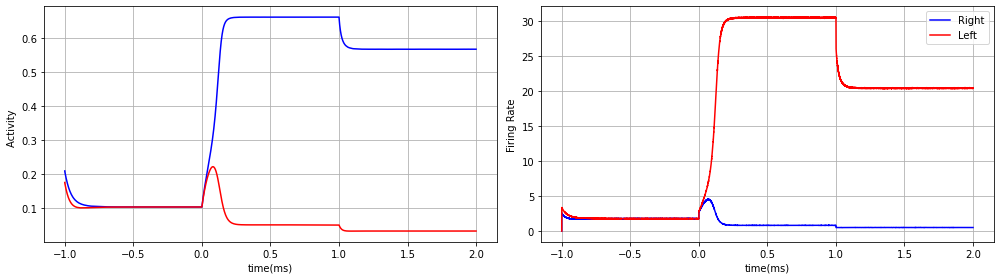

In [10]:
fig = plt.figure(figsize=(14,4))

plt.subplot(121)
plt.plot(time,S_L[0,],'-',color='blue',label='Left Activity')
plt.plot(time,S_R[0,],'-',color='red',label='Right Activity')

#plt.plot([0,1],[0,1],':k')
plt.grid()
plt.xlabel('time(ms)')
plt.ylabel('Activity  ')
#plt.xlim((-100,1500))

plt.subplot(122)

plt.plot(time,H_JB(x_R[0,]),'-',color='blue',label="Right")
plt.plot(time,H_JB(x_L[0,]),'-',color='red',label="Left")
#plt.hlines(15,-100,1500,linestyles='dashed',label='Threshold')
#plt.hlines(5,0,800)

plt.grid()
#plt.xlim((-100,1500))
plt.xlabel('time(ms)')
plt.ylabel('Firing Rate')

#plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)




plt.legend()
plt.tight_layout()
plt.show()


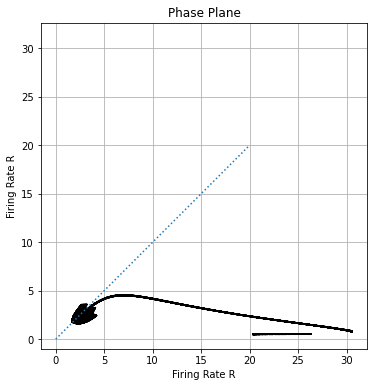

In [11]:
Firing_target_L=H_JB(x_L)
Firing_target_R=H_JB(x_R)

fig = plt.figure(figsize=(6,6))
plt.plot(Firing_target_L,Firing_target_R,'-',color='black')


plt.plot([0,20],[0,20],':')
plt.grid()
plt.xlabel('Firing Rate R')
plt.ylabel('Firing Rate R')
plt.title('Phase Plane')
plt.axis('square')
plt.show()



## References
Wong KF, Wang XJ. A recurrent network mechanism of time integration in perceptual decisions. J Neurosci. 2006 Jan 25;26(4):1314-28. doi: 10.1523/JNEUROSCI.3733-05.2006. PMID: 16436619; PMCID: PMC6674568.

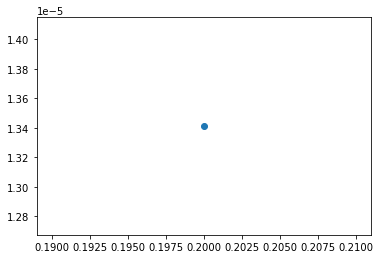

In [12]:
# Function definitons
def x(SL, SR, noise_L, noise_R, direction):
  if (direction == "L"):
    x = JLL*SL - JLR*SR + I0 + IL + noise_L
  elif(direction == "R"):
    x = JRR*SR - JRL*SL + I0 + IR + noise_R
  return x

def H(x):
    a = 270
    b = 108
    d = 0.154
    h = (a*x-b)/(1-np.exp(-d*(a*x-b)))
    return h

# Define Variables
N = len(time) # number of miliseconds (N*0.1) to run for
h = 0.1/1000 # step size

M = 20 # number of experiments for each coherence level

# Initializing different coherence levels to test 
coherence = np.array([0, 0.005, 0.01, 0.015,0.02])#, 0.03, 0.04, 0.05, 0.1, 0.15, 0.25]) # (0, 1,2,3,4,5,10,15 and 25%)
coherence = np.array([0, 0.01,0.02, 0.03, 0.04, 0.05, 0.1, 0.15, 0.25,0.5,0.75]) # (0, 1,2,3,4,5,10,15 and 25%)
coherence = np.array([0.2]) # (0, 1,2,3,4,5,10,15 and 25%)


C = len(coherence) # Number of times the outside loop below runs

# Initial condition for Left and Right
initial_condition_L = 0.3
initial_condition_R = 0.3
# Performing the Euler Method

## Setting Constant Parameter Values
γ = 0.641
τ = 100/1000

JLL = JRR = 0.2609
JLR = JRL = 0.0497
I0 = 0.3255
JA = 5.2*(10**(-4))
μ = 30

# Left and Right input, based on coherence value
IL = JA*μ*(1-(coherence))
IR = JA*μ*(1+(coherence))


plt.plot(coherence,H(IR),':o')

In [13]:
# Initiaizing empty vectors
SL = np.zeros([N+1, M])
SR = np.zeros([N+1, M])
FL = np.zeros([N, M])
FR = np.zeros([N, M])

Reaction_Time = np.zeros([C,M])
Answer = np.zeros([C,M])
#Reaction_Time[:,:] = np.nan
#Answer[:,:] = np.nan

# Setting Initial Conditions
SL[0,0] = initial_condition_L
SR[0,0] = initial_condition_R



for k in range(0,C):
    # Left and Right input, based on coherence value
    IL = JA*μ*(1-(coherence[k]))
    IR = JA*μ*(1+(coherence[k]))
    for j in range (0,M):
        count=0 # initialize the count to zero for the if statement
        
        noise_L = 0.0001*np.random.normal(0,1,N) # create the random noise for L
        noise_R = 0.0001*np.random.normal(0,1,N) # create the random noise for R

        # Set the initial conditions for each iteration
        SL[0,j] = 0.2+0.02*np.random.normal(0,1,1)
        SR[0,j] = 0.2+0.02*np.random.normal(0,1,1)
        for i in range (0,N):
            if i<2000:
                SL[i+1,j] = SL[0,j]
                SR[i+1,j] = SR[0,j]
                
            if i>4000:
                IL = JA*μ*(1-(coherence[k]))
                IR = JA*μ*(1+(coherence[k]))
            else:
                IL=0
                IR=0


            SL[i+1,j]=SL[i,j]+h*((-SL[i,j]/τ) + (1-SL[i,j])*γ*H(x(SL[i,j], SR[i,j], noise_L[i], noise_R[i], "L")))
            SR[i+1,j]=SR[i,j]+h*((-SR[i,j]/τ) + (1-SR[i,j])*γ*H(x(SL[i,j], SR[i,j], noise_L[i], noise_R[i], "R")))
            FR[i,j]=H(x(SL[i,j], SR[i,j], noise_L[i], noise_R[i], "R"))
            FL[i,j]=H(x(SL[i,j], SR[i,j], noise_L[i], noise_R[i], "L"))
            if count==0:
                if FR[i,j]>15: # Run when the firing rate for Right is greater than the decision threshold
                    Reaction_Time[k,j] = i*0.1
                    count = 1 
                    Answer[k,j] = 1
                elif FL[i,j]>15:
                    Reaction_Time[k,j] = i*0.1
                    count = 1
                    Answer[k,j] = 0 

print(Reaction_Time)
print(Answer)

[[803.7 790.8 767.5 784.8 824.2 828.1 805.2 766.8 774.7 813.7 810.2 852.1
  778.3 707.5 748.5 781.8 799.  745.5 759.6 734.6]]
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [14]:
Accuracy = np.zeros([C,1])
Mean_Reaction_Time = np.zeros([C,1])
Mean_Reaction_Time_WRONG = np.zeros([C,1])

Accuracy[:,:] = np.nan
Mean_Reaction_Time[:,:] = np.nan
Mean_Reaction_Time_WRONG[:,:] = np.nan


for k in range (0,C):
    Accuracy[k] = (np.count_nonzero(Answer[k,:] == 1)/len(Answer[k,:]))*100

for k in range (0,C):
    Mean_Reaction_Time[k] = np.mean(Reaction_Time[k,Answer[k,:]==1])
    Mean_Reaction_Time_WRONG[k] = np.mean(Reaction_Time[k,Answer[k,:]==0])
    
print(Mean_Reaction_Time)
print(Accuracy)

[[783.83]]
[[100.]]


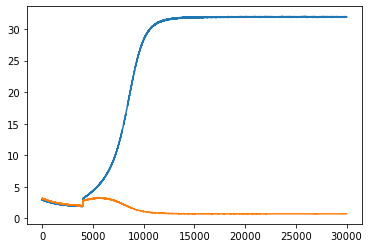

In [15]:
plt.plot(FR[:,0])
plt.plot(FL[:,0])

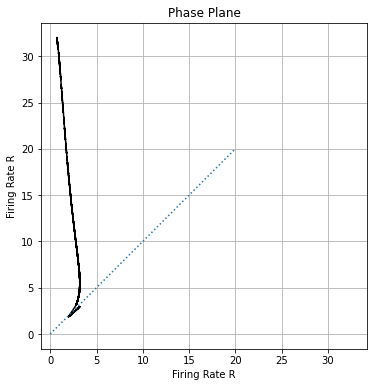

In [16]:

fig = plt.figure(figsize=(6,6))
plt.plot(FL[:,0],FR[:,0],'-',color='black')


plt.plot([0,20],[0,20],':')
plt.grid()
plt.xlabel('Firing Rate R')
plt.ylabel('Firing Rate R')
plt.title('Phase Plane')
plt.axis('square')
plt.show()